# Python for KNN

**Introduction**

This Python notebook is used to implement KNN algorithm, which is a very "lazy" way to classifiy the dataset. However there are many shortages of this algorithm. In thi notebook I will implememnt the basic algorithm.

## 1. Sample dataset

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.preprocessing import Normalizer, StandardScaler,MinMaxScaler
import operator

%matplotlib notebook

In [2]:
sample_num = 30

xdf, ydf = make_multilabel_classification(n_samples=sample_num, n_features=2,
                                      n_classes=1, n_labels=1, random_state=2)

In [21]:
print ("The dataset has %d number of features, and %d number of observations."%(xdf.shape[1],xdf.shape[0]))
print ("The target has %d number of observations, and %d number of classes."%(ydf.shape[0],len(np.unique(ydf, axis = 0))))

The dataset has 2 number of features, and 30 number of observations.
The target has 30 number of observations, and 2 number of classes.


<IPython.core.display.Javascript object>


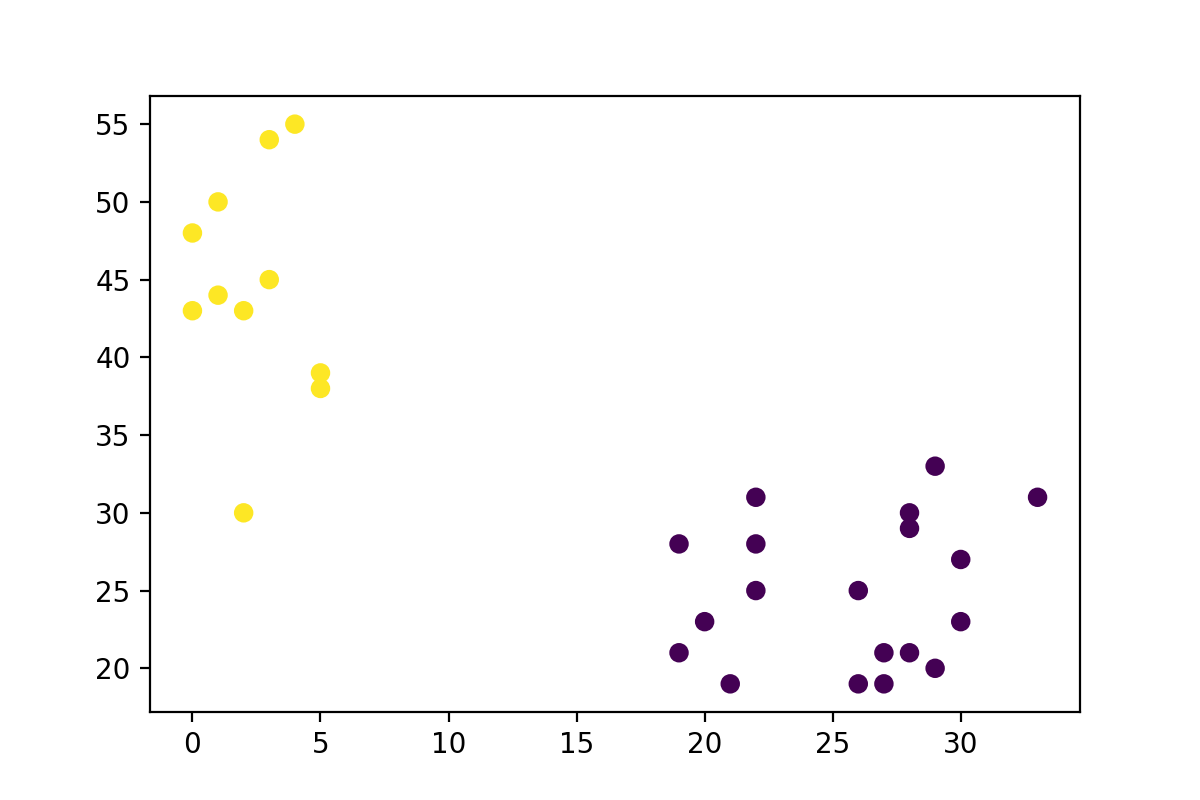

In [33]:
## Plot the data

fig, ax = plt.subplots(figsize = (6,4))

ax.scatter(xdf[:,0],xdf[:,1], c=ydf.reshape(ydf.shape[0],))

plt.show()

In [35]:
ydf = ydf.reshape(ydf.shape[0],)

In [36]:
ydf

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0])

## 2. KNN algorithm

In [94]:
def normalize(X_train):
    """
    This function will normlize the data, so that the range of data will be [0, 1]
    
    Parameters:
    -----------
    X_train: numpy array, with the shape = (num_of_sample, num_of_feature)
    
    Return:
    -------
    X_norm: numpy array after normalization. Same shape as before processing
    
    """
    
    assert isinstance(X_train, np.ndarray)
    
    X_max = np.max(X_train, axis = 0)
    X_min = np.min(X_train, axis = 0)
    
    return (X_train - X_min)/(X_max - X_min)


def standarize(X_train):
    """
    This function will standarize the data, so that the range of data will have mean at zero and variance 1
    
    Parameters:
    -----------
    X_train: numpy array, with the shape = (num_of_sample, num_of_feature)
    
    Return:
    -------
    X_stand: numpy array after standarization. Same shape as before processing
    """
    
    assert isinstance(X_train, np.ndarray)
    
    mean = np.mean(X_train, axis = 0)
    std = np.std(X_train, axis = 0)
    
    return (X_train - mean)/std


def KNN(X_train, y_train, k, X_test):
    """
    This function calculate the KNN algorithm for a single test array. This is a brute force calculation 
    of KNN. Later on, I will implement a better vesion of this algorithm
    
    Parameters:
    -----------
    X_train: numpy array, with the shape = (num_of_sample, num_of_feature)
    y_train: numpy array, with the shape = (num_of_sample, )
    k:       integer, k value
    X_test:  numpy array, with the shape = (1, num_of_feature)
    
    Return:
    -------
    y_test:  integer, the label of the predicted class
    
    """
    
    ## assert the correct data type
    assert isinstance(X_train, np.ndarray)
    assert isinstance(y_train, np.ndarray)
    assert isinstance(X_test , np.ndarray)
    assert isinstance(k, int)
    
    ## asser the correct shape
    num_feature = X_train.shape[1]
    num_sample = X_train.shape[0]
    
    assert y_train.shape == (num_sample, )
    assert X_test.shape == (1, num_feature)
    
    ## calculate the distance:
    distance = np.sqrt(np.sum(np.power((X_train - X_test),2), axis = 1))
    index = distance.argsort()
    
    ## The tricky part:
    ylabel = y_train[index][:k]
    
    count = {}
    for label in ylabel:
        if label not in count.keys():
            count[label] = 1
        else:
            count[label] += 1
            
    return sorted(count.items(), key=operator.itemgetter(1))[-1][0]
        
    